# Project Background

This data is from a project i did in graduate school where we examined the economic and racial characteristics of distinct spatial areas and their associatin with the levels of reinvestment within them. I use python to analyze that data here.

Quantitative measures were used to identify differences between neihgborhoods of interest based on census data. We use the operationalization of gentrification adapted from Hammel and Wyly (1996) and employ four separate quantitative measures of gentrification: 1) change in percent of people over 25 with 4+ years of college; 2) change in median household income; and 3) change in home value. 

Because race is central to theories of gentrification, we also used the percent change in the Black and White population as a measure of racial change. To be considered, each census tracts needed to meet one of two eligibility criteria: (1) they were below the city median income in 2000; or (2) they were majority Black in 2000. Chosen neighborhoods needed to have experienced various levels of gentrification and displacement: (1) high intensity gentrification and displacement; (2) not gentrified and low displacement. 

Census tracts 72 and 74.01, within Washington D.C were chosen for having different levels of gentrification and black displacement based on quantitative data for years of interest 2000-2018.

Qualitative methods were used to directly observe visible indicators of neighborhood change and disorder. To gain a better insight into varying levels and types of neighborhood investment and disinvestment, the built environment of each census tract was manually examined and coded for, via Google Street View (GSV) images. This data is presented below. Indicators in this project: new signs/structures controlling traffic, new public courtesies, signs discouraging disorder, litter, commercial useas aligned with cultural aspects of gentrification.

In [1]:
# Imported pandas libraries into our environment

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration of the plots we will create


In [2]:
# Reading in the data into memory as a pandas dataframe, using read_csv

CensusTractData = pd.read_csv(r'C:\Users\ext.carmen.salazar\Downloads\CensusTractData.csv')

In [3]:
# Looking at the data

CensusTractData.head()

,TractID,Google or IRl,Block Face Direc.,Street Address,Image Month,Image Year,Primary Land Use,Primary Land Use2,# of Strucures,# of Residential Struc.,...,Indicator of foreign presence,Describe Indicator of foregin presence,Visible People?,# of visible people (not in cars),Race of visible people,Age of visible people,Distinct inconsistencies among G.S.V. images,Years available for block face,Major difference btwn previous image yrs. and most recent yr.?,"If yes, briefly describe difference btwn image yrs."
0,72.0,Google,East,1026 3rd St SE,October,2018,Residential,Residential,11,10,...,0,0,1,1,Mostly black,Young adult,"Yes, limited street view access.","2007, 2012, 2014, 2016, 2018",1,New construction ( structure & metal gates/ fe...
1,72.0,Google,North,301 K St. SE,October,2018,Residential,Residential,6,6,...,0,0,1,5,Mostly white,Young adults,"Yes, Limited Street View","2007, 2009, 2011, 2014, 2016, 2017, 2018",1,"New constructed structure, rehabbed older stru..."
2,72.0,Google,South,312 L St SE,October,2018,Residential,Residential,5,5,...,0,0,1,1,Mostly black,Young adult,No,"2007, 2009, 2011, 2014, 2018",1,New construction
3,72.0,Google,East,1114 3rd St SE,August,2018,Residential,Residential,7,7,...,0,0,1,10,Mostly white,"Middle-aged (8), young adults (2),",No,"2007, 2009, 2011, 2012, 2014, 2016, 2018",1,New construction
4,72.0,Google,North,305 L St SE,October,2018,Residential,Residential,24,24,...,0,0,1,9,Mostly black,"Children (2), teens (2), young adults (5)",No,"2007, 2009, 2011, 2014, 2018",1,New construction on entire block


In [4]:
# getting a sense of the information within dataframe like record counts, column names, data types, index range and memory usage
# Looking at the summary, we can see that:
# record count 194, composed of 39 columns, data types are float64, object, and int64
# there are no missing values of any records

CensusTractData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 40 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   TractID                                                         194 non-null    float64
 1   Google or IRl                                                   194 non-null    object 
 2   Block Face Direc.                                               194 non-null    object 
 3   Street Address                                                  194 non-null    object 
 4   Image Month                                                     194 non-null    object 
 5   Image Year                                                      194 non-null    int64  
 6   Primary Land Use                                                194 non-null    object 
 7   Primary Land Use2                                    

In [5]:
# updated column names to eliminate white space and replace them with an underscore

CensusTractData.columns = CensusTractData.columns.str.replace(' ', '_')

In [6]:

CensusTractData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 40 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   TractID                                                         194 non-null    float64
 1   Google_or_IRl                                                   194 non-null    object 
 2   Block_Face_Direc.                                               194 non-null    object 
 3   Street_Address                                                  194 non-null    object 
 4   Image_Month                                                     194 non-null    object 
 5   Image_Year                                                      194 non-null    int64  
 6   Primary_Land_Use                                                194 non-null    object 
 7   Primary_Land_Use2                                    

In [7]:
# get the count of how many Residentail, Industrail, etc.
land_use_types = CensusTractData.loc[:,'Primary_Land_Use2']
land_use_types.value_counts()

Residential      109
Commerical        32
Mixed             22
Other             16
Institutional     14
Industrial         1
Name: Primary_Land_Use2, dtype: int64

In [50]:
# Returns an object of type Series
# gives us all rows, with only the TractID column
tract_column = CensusTractData.loc[:,'TractID']
#print(tract_column)

In [49]:
# filtering data
tract_72_df = CensusTractData.query("TractID == 72")
#print(tract_72_df)

In [10]:
# Generating variables of interest for each tract of interest: census tract 72 and 74.01
# because data is only in 0s and 1s, it sums it all to give 95 blocks with this indicator
new_signs_tract_72 = tract_72_df.loc[:, 'New_Signs/Structues_controlling_traffic']
new_signs_tract_72.sum()

95

In [11]:
new_pcourtesies_72 = tract_72_df.loc[:, 'New_public_courtesies']
new_pcourtesies_72.sum()

84

In [12]:
new_sign_disorder_72 = tract_72_df.loc[:, 'Signs_discouraging_disorder']
new_sign_disorder_72.sum()

58.0

In [13]:
litter_72 = tract_72_df.loc[:, 'Litter']
litter_72.sum()

11

In [14]:
commercial_gent_72 = tract_72_df.loc[:, 'Commercial_uses_alligned_w/_cultural_aspects_of_gentrification']
commercial_gent_72.sum()

24

In [48]:
tract_74_01_df = CensusTractData.query("TractID == 74.01")
#print(tract_74_01_df)

In [16]:
new_signs_tract_74_01 = tract_74_01_df.loc[:, 'New_Signs/Structues_controlling_traffic']
new_signs_tract_74_01.sum()

11

In [17]:
new_pcourtesies_74_01 = tract_74_01_df.loc[:, 'New_public_courtesies']
new_pcourtesies_74_01.sum()

7

In [18]:
new_sign_disorder_74_01 = tract_74_01_df.loc[:, 'Signs_discouraging_disorder']
new_sign_disorder_74_01.sum()

11.0

In [19]:
litter_74_01 = tract_74_01_df.loc[:, 'Litter']
litter_74_01.sum()

15

In [20]:
commercial_gent_74_01 = tract_74_01_df.loc[:, 'Commercial_uses_alligned_w/_cultural_aspects_of_gentrification']
commercial_gent_74_01.sum()

0

In [21]:
# tract 72 indicator: New_Signs/Structues_controlling_traffic

# checking total blocks, sum of indicator, and total percentage of blocks with that indicator 
# calculating and creating percentages for census tract 72


number_of_blocks_in_tract_72 = len(tract_72_df)
num_signs_tract_72 = new_signs_tract_72.sum()
print("number of total blocks:", number_of_blocks_in_tract_72)

print("total blocks with new Signs/Structues controlling traffic:", num_signs_tract_72)
per_new_signs_tract_72 = (num_signs_tract_72 * 100.0) / number_of_blocks_in_tract_72
print("percent of total blocks with indicator:", per_new_signs_tract_72)

number of total blocks: 115
total blocks with new Signs/Structues controlling traffic: 95
percent of total blocks with indicator: 82.6086956521739


In [22]:
# tract 72 indicator: New_public_courtesies

num_pcourtesies_tract_72 = new_pcourtesies_72.sum()
print("total blocks with new public courtesies:", num_pcourtesies_tract_72)

per_new_pcourtesies_tract_72 = (num_pcourtesies_tract_72 * 100.0) / number_of_blocks_in_tract_72
print("percent of total blocks with indicator:", per_new_pcourtesies_tract_72)

total blocks with new public courtesies: 84
percent of total blocks with indicator: 73.04347826086956


In [23]:
# tract 72 indicator: Signs_discouraging_disorder

num_sign_disorder_72 = new_sign_disorder_72.sum()
print("total blocks with signs discouraging disorder:", num_sign_disorder_72)

per_sign_disorder_tract_72 = (num_sign_disorder_72 * 100.0) / number_of_blocks_in_tract_72
print("percent of total blocks with indicator:", per_sign_disorder_tract_72)

total blocks with signs discouraging disorder: 58.0
percent of total blocks with indicator: 50.43478260869565


In [24]:
# tract 72 indicator: litter
    
num_litter_72 = litter_72.sum()
print("total blocks with litter:", num_litter_72)

per_litter_tract_72 = (num_litter_72 * 100.0) / number_of_blocks_in_tract_72
print("percent of total blocks with indicator:", per_litter_tract_72)

total blocks with litter: 11
percent of total blocks with indicator: 9.565217391304348


In [25]:
# tract 72 indicator: commercial_uses_alligned_w/_cultural_aspects_of_gentrification

num_commercial_gent_72 = commercial_gent_72.sum()
print("total blocks with commercial uses alligned w/ cultural aspects of gentrification:", num_commercial_gent_72)

per_commercial_gent_72 = (num_commercial_gent_72 * 100.0) / number_of_blocks_in_tract_72
print("percent of total blocks with indicator:", per_commercial_gent_72)

total blocks with commercial uses alligned w/ cultural aspects of gentrification: 24
percent of total blocks with indicator: 20.869565217391305


In [26]:
# tract 74.01 indicator: New_Signs/Structues_controlling_traffic

# checking total blocks, sum of indicator, and total percentage of blocks with that indicator 
# calculating and creating percentages for census tract 74.01


number_of_blocks_in_tract_74_01 = len(tract_74_01_df)
num_signs_tract_74_01 = new_signs_tract_74_01.sum()
print("number of total blocks:", number_of_blocks_in_tract_74_01)

print("total blocks with new Signs/Structues controlling traffic:", num_signs_tract_74_01)
per_new_signs_tract_74_01 = (num_signs_tract_74_01 * 100.0) / number_of_blocks_in_tract_74_01
print("percent of total blocks with indicator:", per_new_signs_tract_74_01)

number of total blocks: 21
total blocks with new Signs/Structues controlling traffic: 11
percent of total blocks with indicator: 52.38095238095238


In [27]:
# tract 74.01 indicator: New_public_courtesies

num_pcourtesies_tract_74_01 = new_pcourtesies_74_01.sum()
print("total blocks with new public courtesies:", num_pcourtesies_tract_74_01)

per_new_pcourtesies_tract_74_01 = (num_pcourtesies_tract_74_01 * 100.0) / number_of_blocks_in_tract_74_01
print("percent of total blocks with indicator:", per_new_pcourtesies_tract_74_01)

total blocks with new public courtesies: 7
percent of total blocks with indicator: 33.333333333333336


In [28]:
# tract 74.01 indicator: Signs_discouraging_disorder

num_sign_disorder_74_01 = new_sign_disorder_74_01.sum()
print("total blocks with signs discouraging disorder:", num_sign_disorder_74_01)

per_sign_disorder_tract_74_01 = (num_sign_disorder_74_01 * 100.0) / number_of_blocks_in_tract_74_01
print("percent of total blocks with indicator:", per_sign_disorder_tract_74_01)

total blocks with signs discouraging disorder: 11.0
percent of total blocks with indicator: 52.38095238095238


In [29]:
# tract 74.01 indicator: litter
    
num_litter_74_01 = litter_74_01.sum()
print("total blocks with litter:", num_litter_74_01)

per_litter_tract_74_01 = (num_litter_74_01 * 100.0) / number_of_blocks_in_tract_74_01
print("percent of total blocks with indicator:", per_litter_tract_74_01)

total blocks with litter: 15
percent of total blocks with indicator: 71.42857142857143


In [30]:
# tract 74.01 indicator: commercial_uses_alligned_w/_cultural_aspects_of_gentrification

num_commercial_gent_74_01 = commercial_gent_74_01.sum()
print("total blocks with commercial uses alligned w/ cultural aspects of gentrification:", num_commercial_gent_74_01)

per_commercial_gent_74_01 = (num_commercial_gent_74_01 * 100.0) / number_of_blocks_in_tract_74_01
print("percent of total blocks with indicator:", per_commercial_gent_74_01)

total blocks with commercial uses alligned w/ cultural aspects of gentrification: 0
percent of total blocks with indicator: 0.0


## Plotting it out - visualizing investment and disinvestment within each census tract

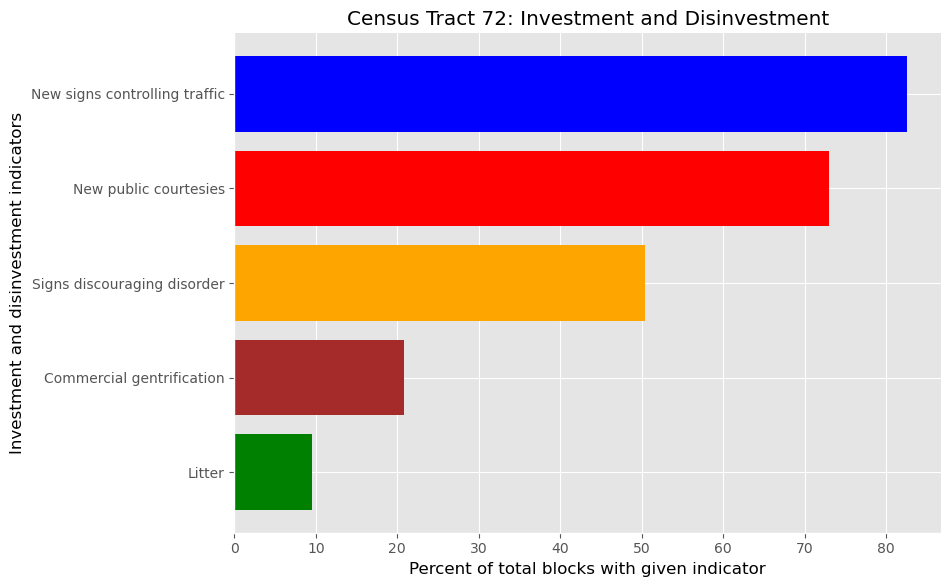

In [33]:
# creating and adjusting plots for census tract 72

plt.figure(figsize=(8, 6)) # size of the figure in inches
plt.title('Title', fontsize=16) # size of font in title
plt.xlabel('X Label', fontsize=12) # size of font for x-axis
plt.ylabel('Y Label', fontsize=12) # size of font for y-axis
plt.xticks(fontsize=10) # font size of x-axis tick labels
plt.yticks(fontsize=10) # font size of y-axis tick labels
plt.grid(True) # adds gridlines to plot
plt.gca().spines['top'].set_visible(False) # hides top spine of plot
plt.gca().spines['right'].set_visible(False) # hides right spine of the plot
plt.tight_layout() # adjusts spacing between subplots and labels

height = [9.56, 20.86, 50.43, 73.04, 82.61]

bars = ('Litter', 'Commercial gentrification', 'Signs discouraging disorder', 'New public courtesies', 'New signs controlling traffic')
    
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the x-axis
plt.yticks(y_pos, bars)

# Create bars with different colors
plt.barh(bars, height, color=['green', 'brown', 'orange', 'red', 'blue'])

# Add title and axis names
plt.title('Census Tract 72: Investment and Disinvestment')
plt.xlabel('Percent of total blocks with given indicator')
plt.ylabel('Investment and disinvestment indicators')


# Show graphic
plt.show()

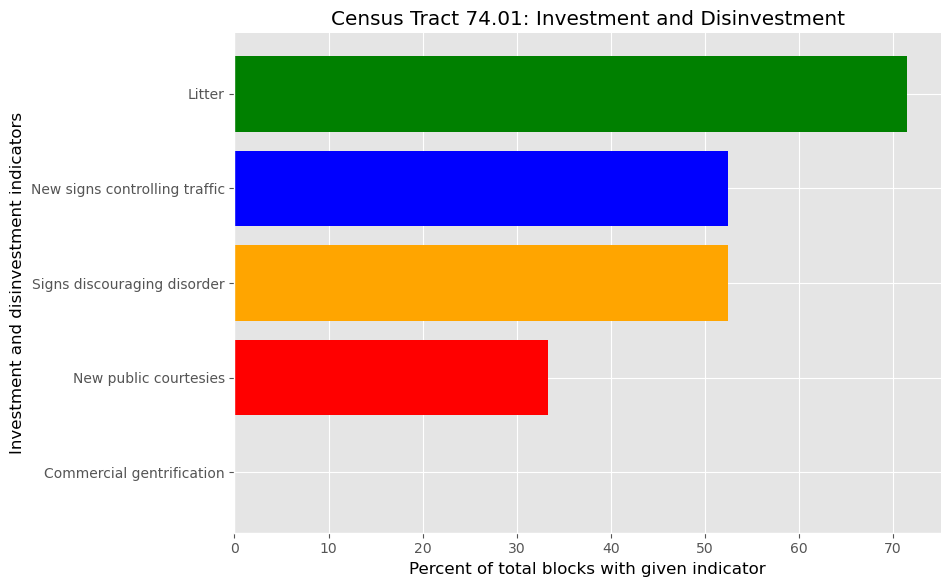

In [35]:
# creating and adjusting plots for census tract 74.01

plt.figure(figsize=(8, 6))
plt.title('Title', fontsize=16)
plt.xlabel('X Label', fontsize=12)
plt.ylabel('Y Label', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

height = [0.0, 33.3, 52.4, 52.4, 71.5]

bars = ('Commercial gentrification', 'New public courtesies', 'Signs discouraging disorder', 'New signs controlling traffic', 'Litter')
    
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the x-axis
plt.yticks(y_pos, bars)

# Create bars with different colors
plt.barh(bars, height, color=['brown', 'red', 'orange', 'blue', 'green'])
 
# Add title and axis names
plt.title('Census Tract 74.01: Investment and Disinvestment')
plt.xlabel('Percent of total blocks with given indicator')
plt.ylabel('Investment and disinvestment indicators')


# Show graphic
plt.show()

## Creating line charts representing the change in racial composition from 2000 and 2018

In [37]:

years = [2000, 2018]
black_72 = [96, 23.5]
white_72 = [3.3, 68]
black_74_01 = [98,92]
white_74_01 = [0.47, 3.5]

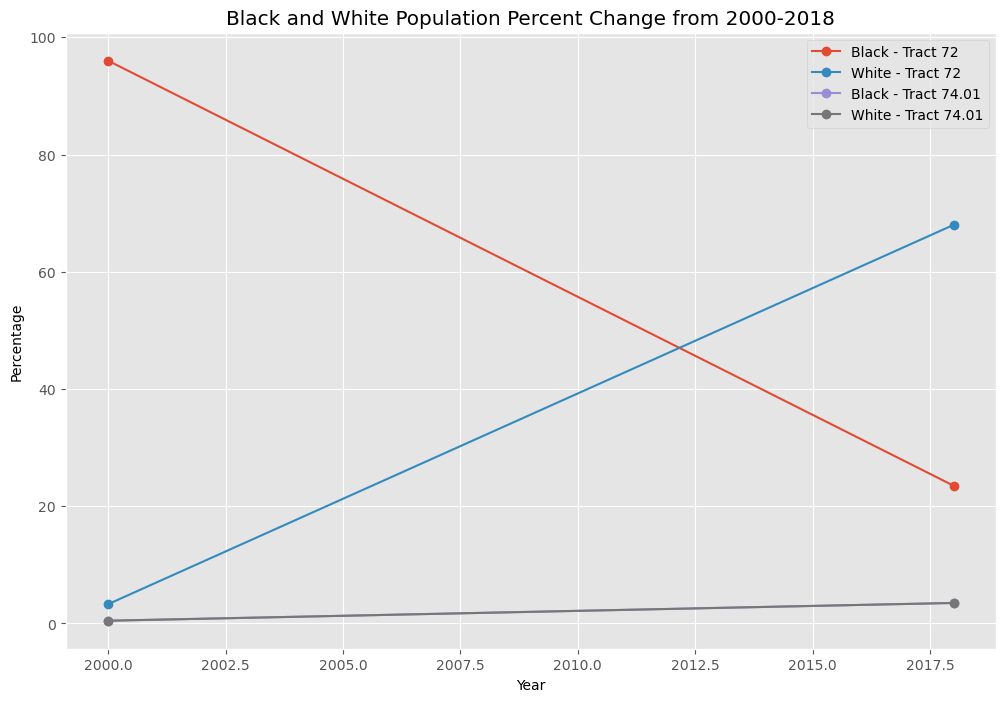

In [54]:
# Line plot for census tract 72

plt.plot(years, black_72, marker='o', label = 'Black - Tract 72')
plt.plot(years, white_72, marker='o', label = 'White - Tract 72')

# Line plot for census tract 74.01

plt.plot(years, black_74_01, marker='o', label = 'Black - Tract 74.01')
plt.plot(years, white_74_01, marker='o', label = 'White - Tract 74.01')

# adding title and labels

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Black and White Population Percent Change from 2000-2018')

# adding a legend

plt.legend()

# showing chart

plt.show()


## Line charts representing the change in socioeconomic status from 2000 and 2018

In [40]:
degree_72 = [0, 1370]
income_72 = [0, 872.7]
housing_72 = [0, 201]
degree_74_01 = [0, 318.5]
income_74_01 = [0, -33.6]
housing_74_01 = [0, 18]

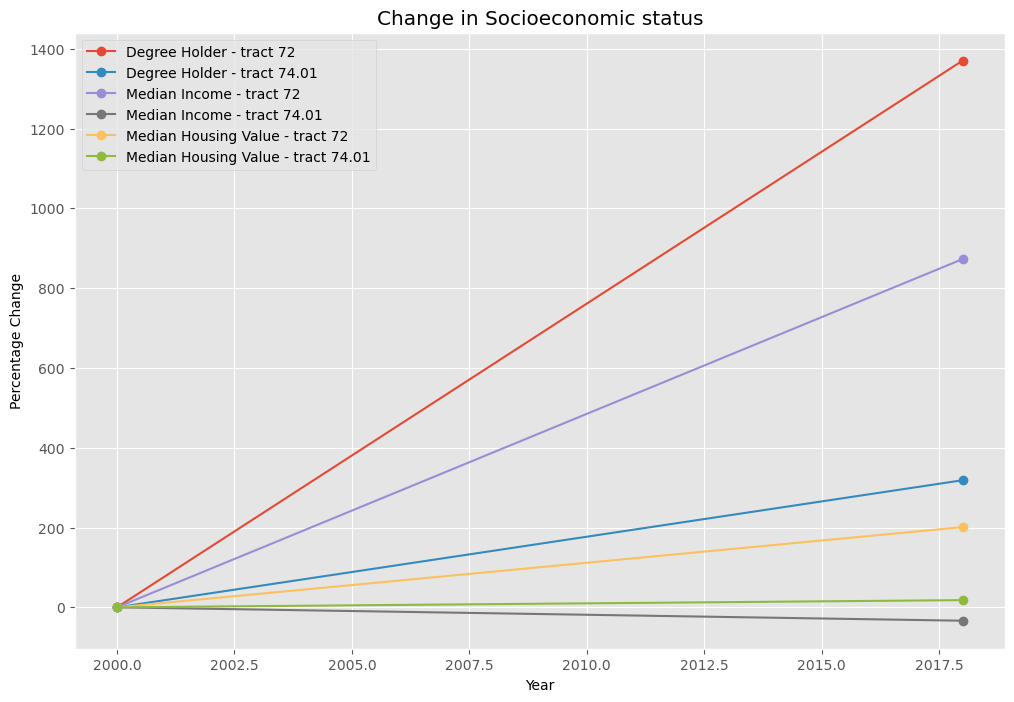

In [44]:
plt.plot(years, degree_72, marker='o', label='Degree Holder - tract 72')
plt.plot(years, degree_74_01, marker='o', label='Degree Holder - tract 74.01')

plt.plot(years, income_72, marker='o', label='Median Income - tract 72')
plt.plot(years, income_74_01, marker='o', label='Median Income - tract 74.01')

plt.plot(years, housing_72, marker='o', label='Median Housing Value - tract 72')
plt.plot(years, housing_74_01, marker='o', label='Median Housing Value - tract 74.01')



plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Change in Socioeconomic status')

plt.legend()

plt.show()

## Wrapping it up

#### Census Tract 72 

By most quantitative measures stated above, census tract 72 is the most gentrified neighborhood in Washington DC, having experienced complete redevelopment and displacement of majority of its Black residents. 

Since 2000, this tract, located in Navy Yard, has experienced:
- 1370.2% increase of individuals with college degrees
- median household income increase of 872.7%
- median housing value increase of 201%. 

In 2018, the Black population had decreased from 96% to 23.5% while the White population increased from 3.3% to 68%. 

Tract 72 experienced significant gentrification and a drastic decline of 75% of its Black population, and therefore had the highest levels of public investment, including commercial uses aligned with gentrification, and the lowest levels of public disinvestment


#### Census Tract 74.01

By contrast, Census tract 74.01 had minimal signs of redevelopment, and thus had not gentrified nor experienced high levels of Black displacement in 2018. 

Since 2000, census tract 74.01, located in Petworth, has experienced:
- 318.5% increase of individuals with college degrees
- median household income decrease of 33.6%
- median housing value increase of 18%. 

In 2018, the Black population had decreased from 98% to 92% while the White population increased from 0.47% to 3.5%.

Tract 74.01 having experienced minimal signs of development and thus had not experienced gentrification nor experienced high levels of black displacement (6% decline) in 2018, had the highest levels of public disinvestment, significantly less public investment than tract 72, and no commercial uses aligned with gentrification. 

#### Conclusion

These results appear to suggest that as levels of gentrification increase, so do (1) the levels of displacement among the black population and (2) the levels of public and private reinvestment. Neighborhoods that experience an increase in economic-based indicators of gentrification exhibit the same upward demographic shift in displacement of the black population and increase of investment. Race and ethnicity are salient determinants of investment patterns. As the percentage of black and Hispanic residents increases, commercial investment tends to decline (Immergluck 1999). Displacement of black residents increases forms of public and private investment experienced within neighborhoods experiencing demographic change. These results complement literature focused on the relation between race and gentrification whereby racism influences the consequences and benefits of the process that are experienced by majority black and white neighborhoods (Jackson 2015). As gentrification accompanies the share of black and latinx residents (Sutton 2020) and a decline of the black population as middle-and upper income individuals move into minority neighborhoods (Jackson 2015), the process appears to perpetuate racial inequality. 